<h1 style="font-family: Source Sans Pro; padding: 12px; font-size: 48px; color: #F6416C; text-align: center; line-height: 1.25;"><b>Heart Failure EDA & ANN Modeling </span></b><br><span style="color: #FF9A00; font-size: 24px"></h1>
<hr>

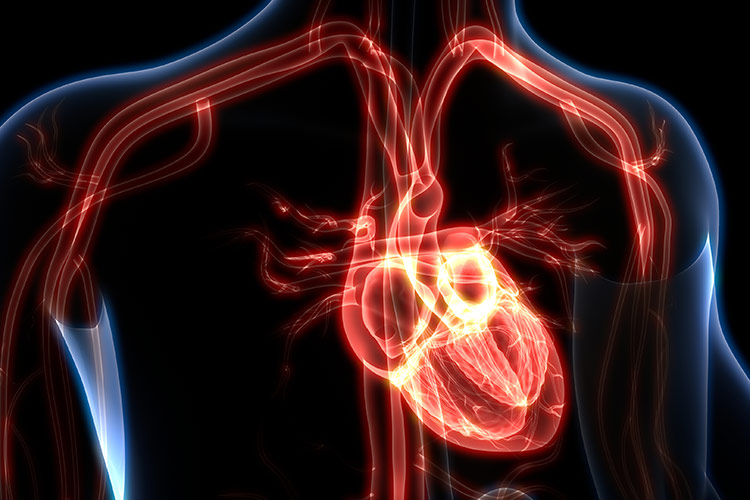

1. age: age of person  
2. Sex: Male or Female
3. ChestPinType : any pain in the area of your chest
4. RestinBP : Resting Blood Pressure (Hypertension)
5. fasting BS : A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours
6. RestingECG:is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks
7. MaxHR : Maximum Heart Rate
8. ExerciseAngina : If person do angina exercise or not
9.

# Importing Data

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected= True)


In [98]:
data=pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [99]:
data.shape


(918, 12)

In [100]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [101]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [102]:
for i in data.columns :
    print(i)
    print(data[i].value_counts())
    print('-'*100)

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
----------------------------------------------------------------------------------------------------
Sex
M    725
F    193
Name: Sex, dtype: int64
----------------------------------------------------------------------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
----------------------------------------------------------------------------------------------------
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185  

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [104]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

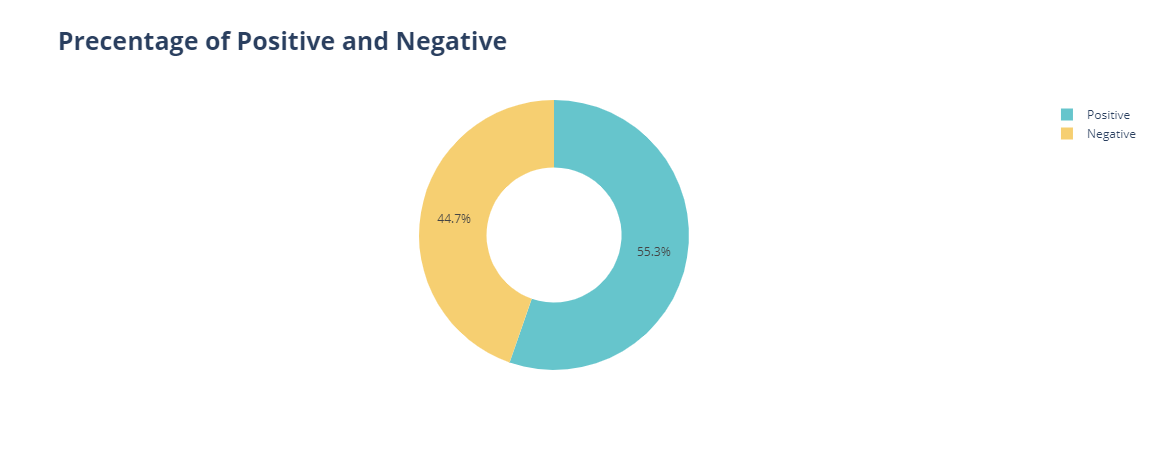

In [105]:
fig=px.pie(data,names=['Positive','Negative'],values=data['HeartDisease'].value_counts(),hole=0.5,
           title="<b>Precentage of Positive and Negative ",template='plotly',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_font_size=25)
fig.show()

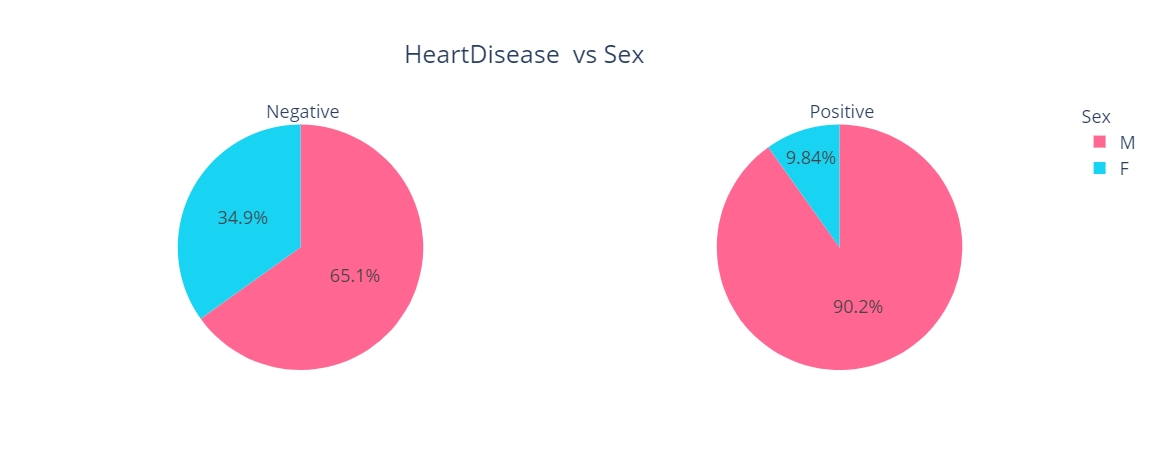

In [106]:
counts0 = Counter(data[data['HeartDisease']==0]['Sex'])
counts1 = Counter(data[data['HeartDisease']==1]['Sex'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs Sex','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Sex",
    font=dict(size=18)
)

fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

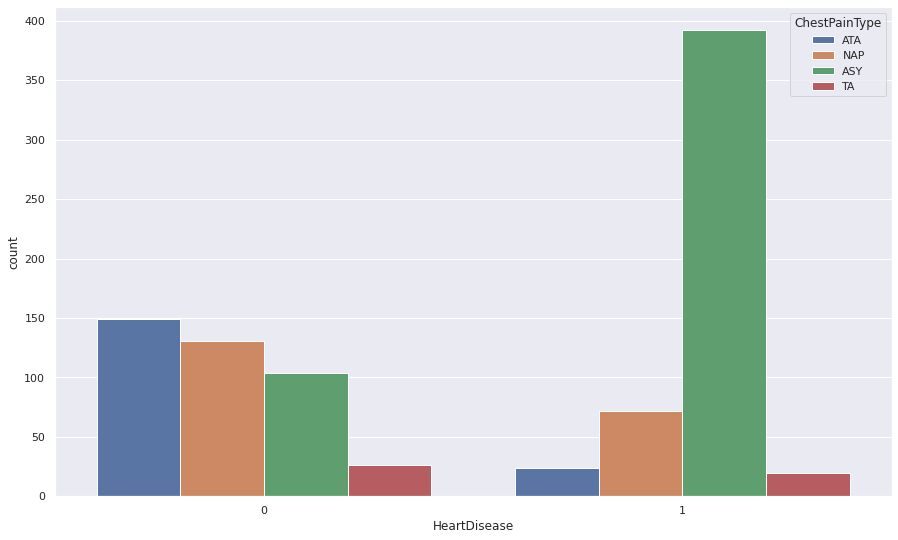

In [107]:
plt.figure(figsize=(15,9))
sns.countplot(data['HeartDisease'],hue=data['ChestPainType'])

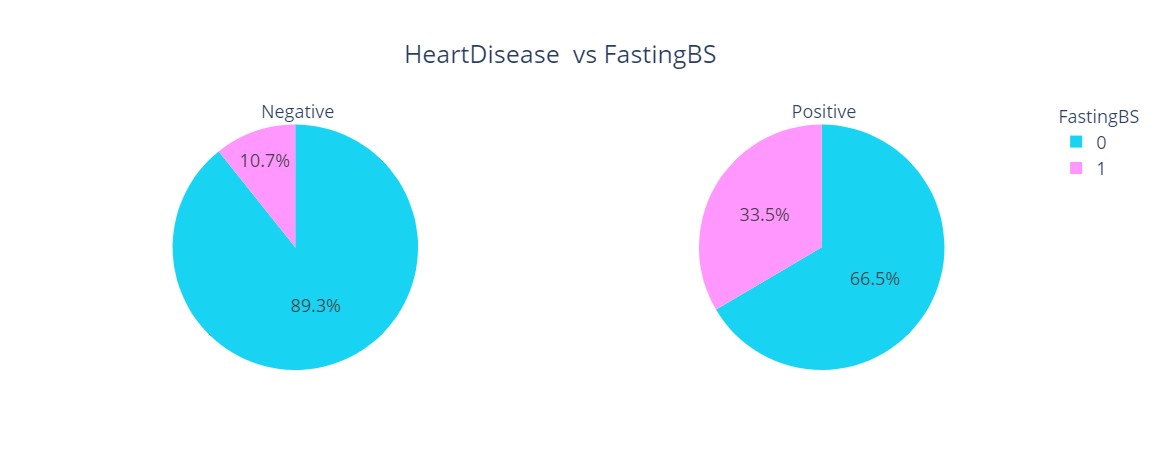

In [108]:
counts0 = Counter(data[data['HeartDisease']==0]['FastingBS'])
counts1 = Counter(data[data['HeartDisease']==1]['FastingBS'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF97FF']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs FastingBS','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="FastingBS",
    font=dict(size=18)
)

fig.show()

Text(0, 0.5, 'Count')

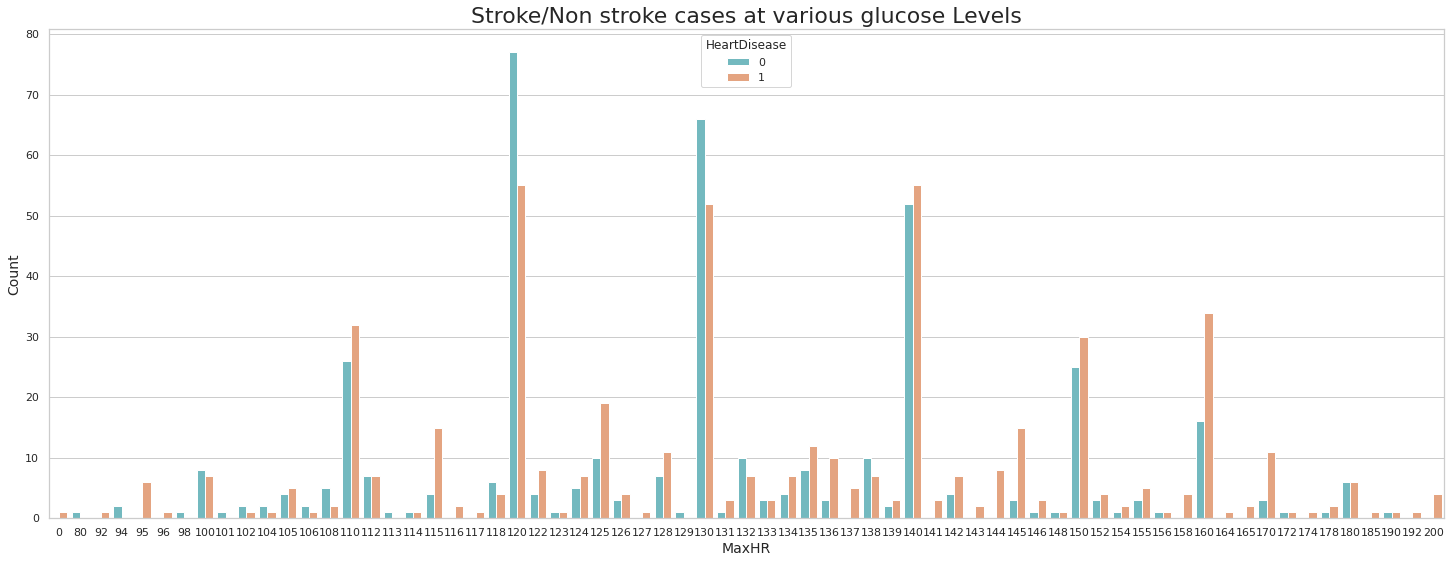

In [109]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='RestingBP',hue='HeartDisease',palette=['#66C4CC',"#F59F70"],data=data)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('MaxHR',fontsize=14)
ax.set_ylabel('Count',fontsize=14)


In [110]:
str_only = data[data['HeartDisease'] == 1]
no_str_only = data[data['HeartDisease'] == 0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



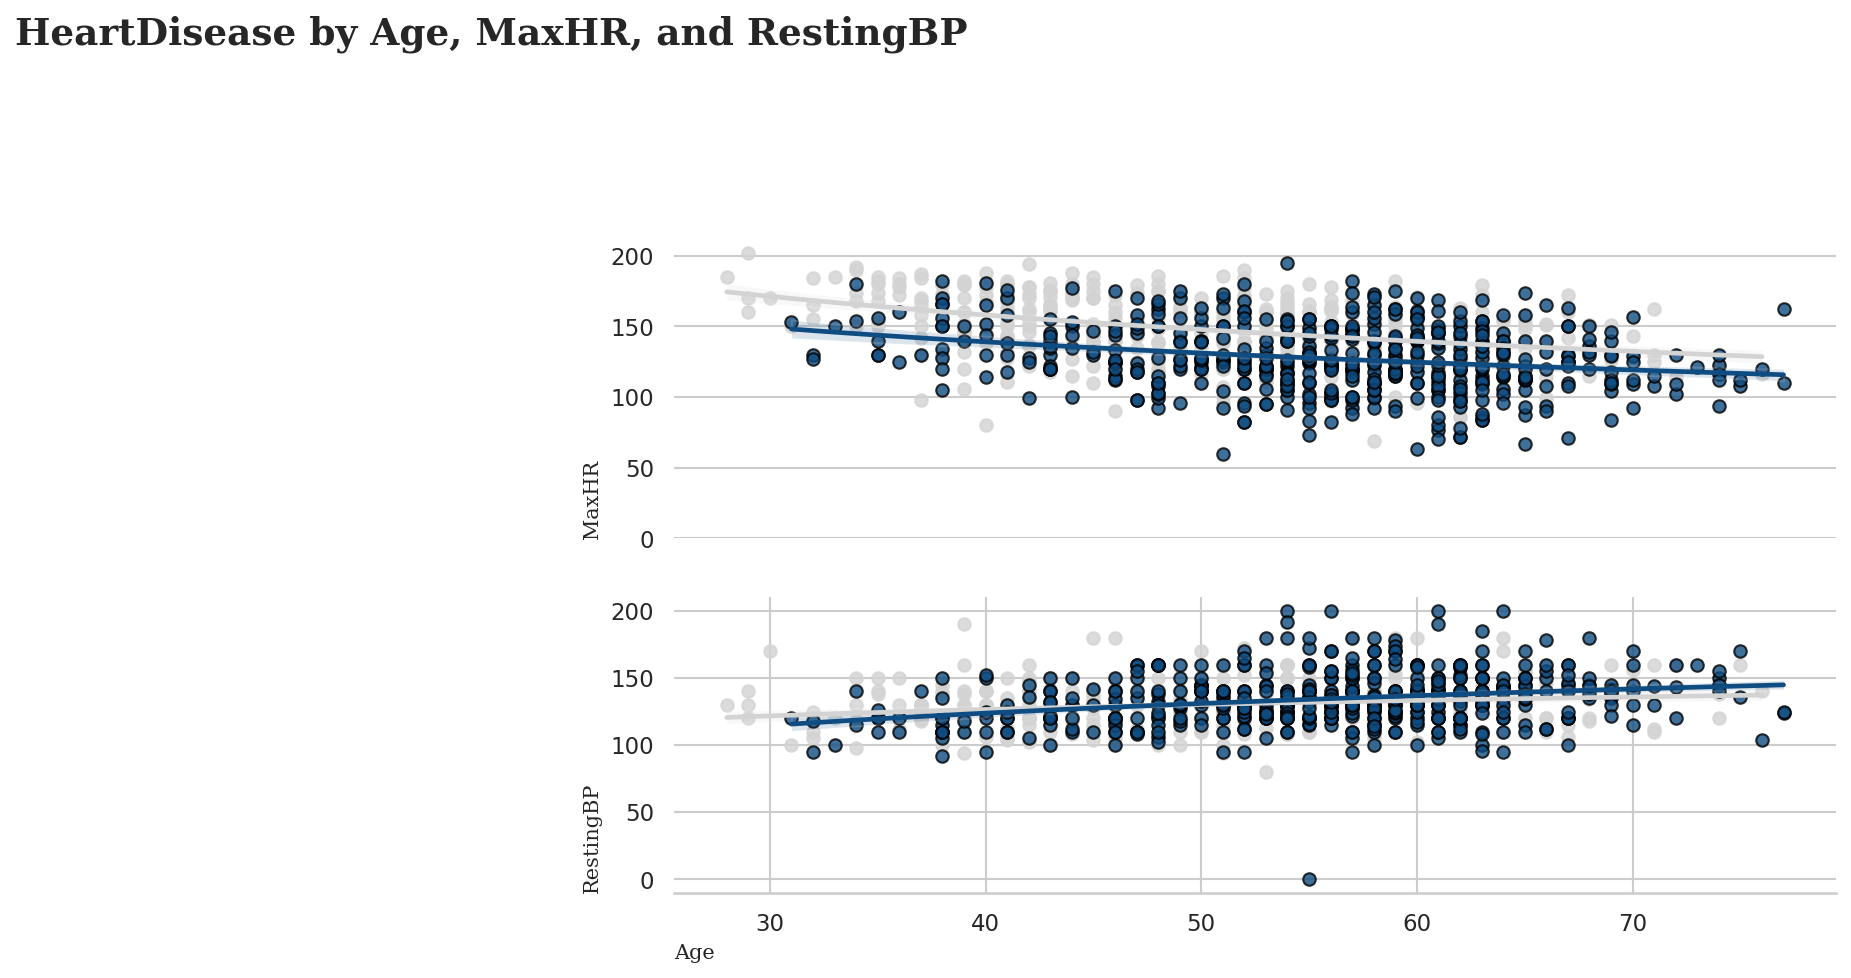

In [111]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,12),dpi=150,facecolor='white') 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor("white")
ax1.set_facecolor('white')

# glucose

sns.regplot(no_str_only['Age'],y=no_str_only['MaxHR'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['Age'],y=str_only['MaxHR'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("MaxHR",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)
# bmi
sns.regplot(no_str_only['Age'],y=no_str_only['RestingBP'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['Age'],y=str_only['RestingBP'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("RestingBP",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'HeartDisease by Age, MaxHR, and RestingBP',fontsize=18,fontfamily='serif',fontweight='bold')
# ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


# ax0.tick_params(axis=u'both', which=u'both',length=0)
# ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

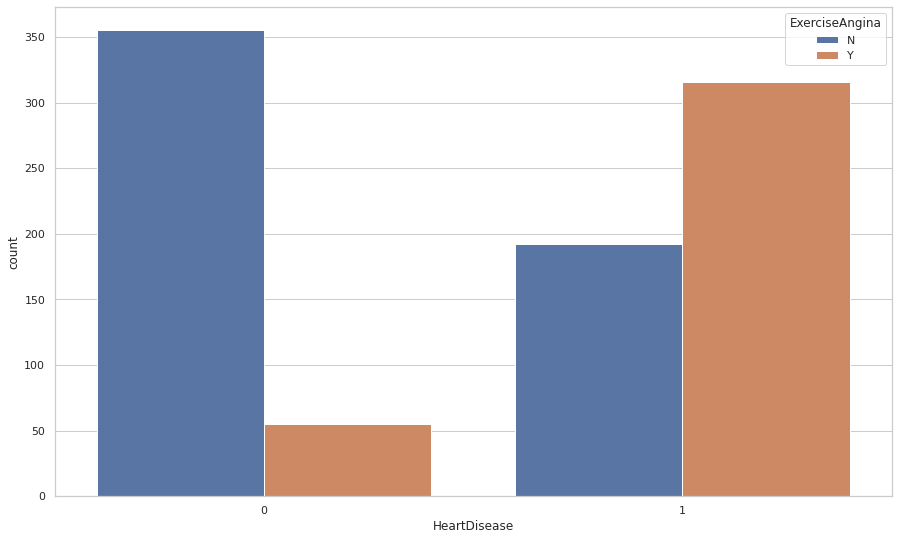

In [112]:
plt.figure(figsize=(15,9))
sns.countplot(data['HeartDisease'],hue=data['ExerciseAngina'])

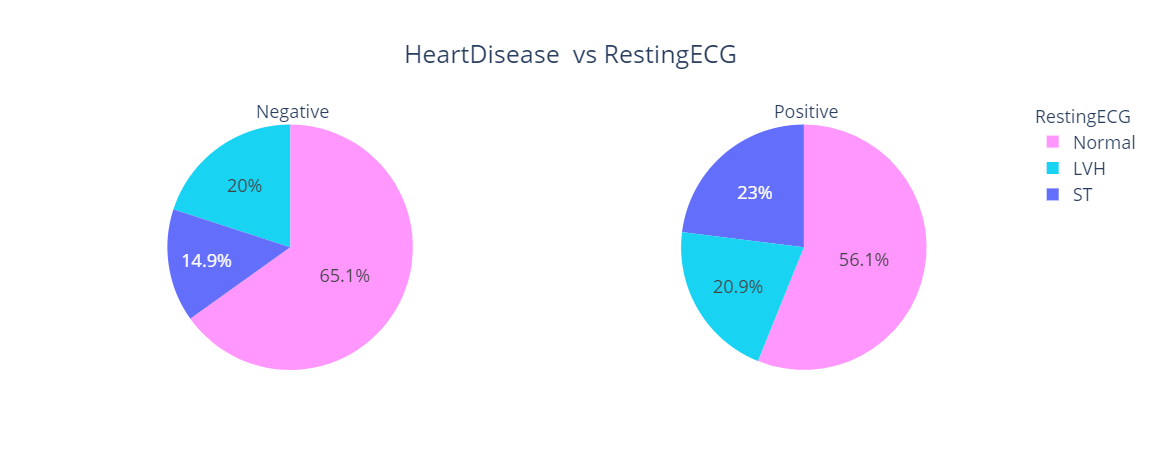

In [113]:
counts0 = Counter(data[data['HeartDisease']==0]['RestingECG'])
counts1 = Counter(data[data['HeartDisease']==1]['RestingECG'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name=" Negative",title=' Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF97FF']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name=" Positive",title=' Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'HeartDisease  vs RestingECG','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="RestingECG",
    font=dict(size=18)
)

fig.show()

# Missing Values


In [114]:
data.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

# '0' is missing values


In [115]:
data['Cholesterol'] = data['Cholesterol'].replace([0],np.nan)


In [116]:
df2=data.copy()


In [117]:
df2.Cholesterol.value_counts()

254.0    11
223.0    10
220.0    10
216.0     9
230.0     9
         ..
347.0     1
365.0     1
412.0     1
491.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

<Figure size 1080x720 with 0 Axes>

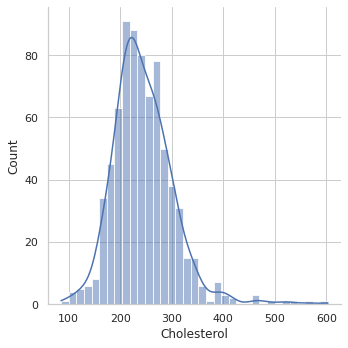

In [118]:
#The distribution of the data of the column
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "Cholesterol", kde = True)

In [119]:
df2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [120]:
#filling the missings randomly
fill_list = data["Cholesterol"].dropna()
df2 = data["Cholesterol"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [121]:
df2.value_counts()

220.0    15
254.0    14
223.0    14
204.0    13
211.0    12
         ..
518.0     1
316.0     1
468.0     1
458.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

In [122]:
df2.isnull().sum()

0

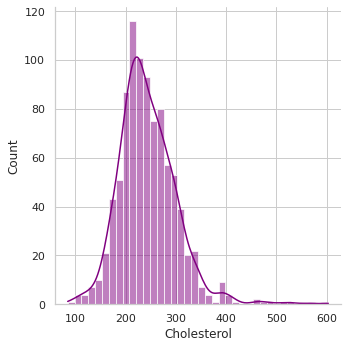

In [123]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [124]:
df3 = data["Cholesterol"].fillna(data["Cholesterol"].mean())
df3

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

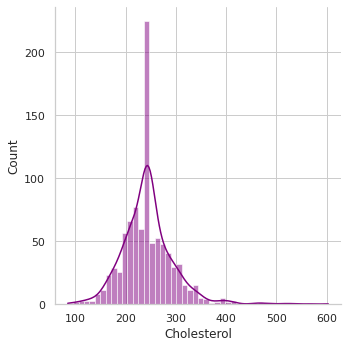

In [125]:
#checking the distribution after filling the missing values with the mean
sns.displot(df3, kde = True, color = "Purple")

In [126]:
data["Cholesterol"] = df2
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [127]:
data.Cholesterol.value_counts()

220.0    15
254.0    14
223.0    14
204.0    13
211.0    12
         ..
518.0     1
316.0     1
468.0     1
458.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

# Outliers

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

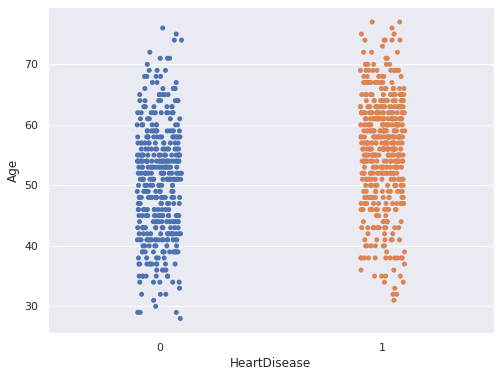

In [128]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Age", x ="HeartDisease", data = data)

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

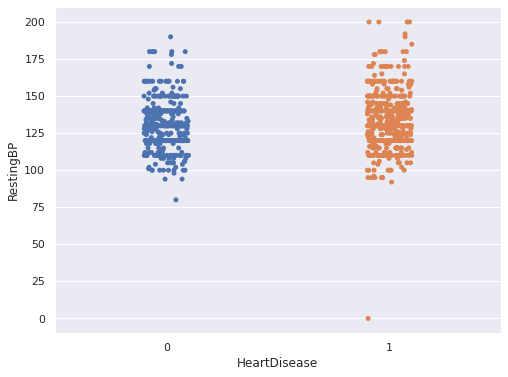

In [129]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data)

In [130]:
#Handling the outliers in this column
data = data.loc[(data["RestingBP"]>80)]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

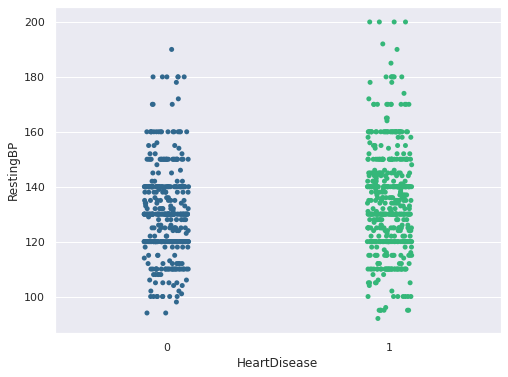

In [131]:
#re-checking for the outliers
sns.stripplot(y="RestingBP", x ="HeartDisease", data = data, palette='viridis')

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

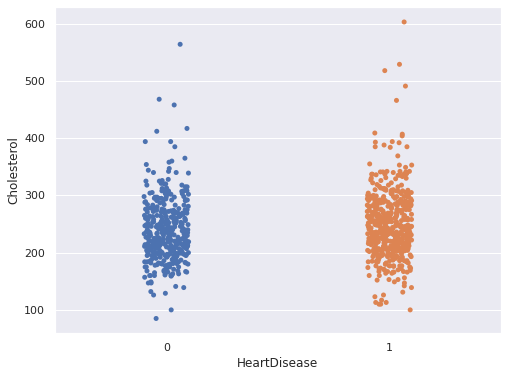

In [132]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Cholesterol", x ="HeartDisease", data = data)

In [133]:
#Handling the outliers in this column
data = data.loc[(data["Cholesterol"]<450)]
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

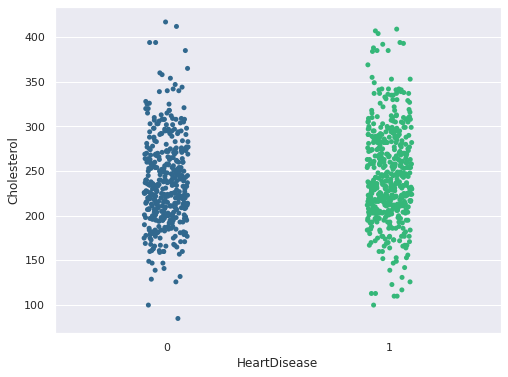

In [134]:
#re-checking for the outliers
sns.stripplot(y="Cholesterol", x ="HeartDisease", data = data, palette='viridis')

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

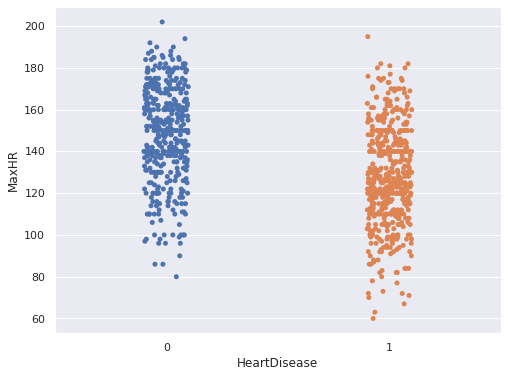

In [135]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="MaxHR", x ="HeartDisease", data = data)

# Encoding

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             908 non-null    int64  
 1   Sex             908 non-null    object 
 2   ChestPainType   908 non-null    object 
 3   RestingBP       908 non-null    int64  
 4   Cholesterol     908 non-null    float64
 5   FastingBS       908 non-null    int64  
 6   RestingECG      908 non-null    object 
 7   MaxHR           908 non-null    int64  
 8   ExerciseAngina  908 non-null    object 
 9   Oldpeak         908 non-null    float64
 10  ST_Slope        908 non-null    object 
 11  HeartDisease    908 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 124.5+ KB


In [137]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["Sex"] = gender_le.fit_transform(data["Sex"])

In [138]:
data.Sex.value_counts()

1    717
0    191
Name: Sex, dtype: int64

In [139]:
ChestPainType_le = LabelEncoder()
data["ChestPainType"] = ChestPainType_le.fit_transform(data["ChestPainType"])

In [140]:
data.ChestPainType.value_counts()

0    490
2    200
1    172
3     46
Name: ChestPainType, dtype: int64

In [141]:
RestingECG_le = LabelEncoder()
data["RestingECG"] = RestingECG_le.fit_transform(data["RestingECG"])

In [142]:
data.RestingECG.value_counts()

1    543
0    187
2    178
Name: RestingECG, dtype: int64

In [143]:
ExerciseAngina_le = LabelEncoder()
data["ExerciseAngina"] = ExerciseAngina_le.fit_transform(data["ExerciseAngina"])

In [144]:
data.ExerciseAngina.value_counts()

0    540
1    368
Name: ExerciseAngina, dtype: int64

In [145]:
ST_Slope_le = LabelEncoder()
data["ST_Slope"] = ST_Slope_le.fit_transform(data["ST_Slope"])

In [146]:
data.ST_Slope.value_counts()

1    453
2    394
0     61
Name: ST_Slope, dtype: int64

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             908 non-null    int64  
 1   Sex             908 non-null    int64  
 2   ChestPainType   908 non-null    int64  
 3   RestingBP       908 non-null    int64  
 4   Cholesterol     908 non-null    float64
 5   FastingBS       908 non-null    int64  
 6   RestingECG      908 non-null    int64  
 7   MaxHR           908 non-null    int64  
 8   ExerciseAngina  908 non-null    int64  
 9   Oldpeak         908 non-null    float64
 10  ST_Slope        908 non-null    int64  
 11  HeartDisease    908 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 124.5 KB


<AxesSubplot:>

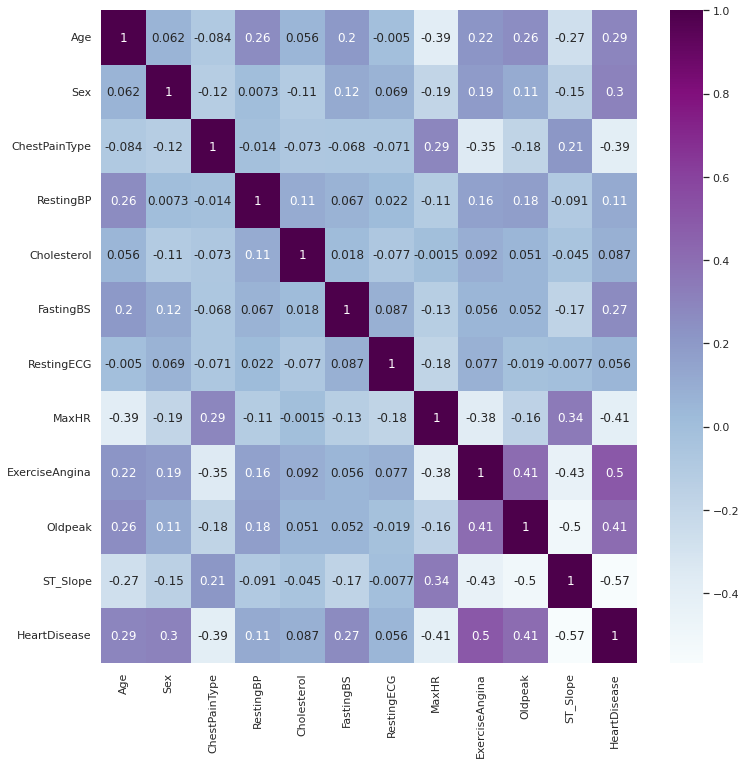

In [148]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

In [149]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Feature Selection

In [150]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2,f_classif

In [151]:
X=data.drop('HeartDisease',axis=1).values
y=data['HeartDisease'].values

In [152]:
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [153]:
X.shape

(908, 11)

In [154]:
y.shape

(908,)

In [155]:
FeatureSelection=SelectPercentile(score_func=f_classif,percentile=80)
X_Sel=FeatureSelection.fit_transform(X,y)

In [156]:
X_Sel.shape

(908, 8)

In [157]:
FeatureSelection.get_support()

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True,  True])

In [158]:
X_Sel

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

# Scalling

In [159]:
from sklearn.preprocessing import StandardScaler
scalr=StandardScaler(copy=True,with_mean=True,with_std=True)
X=scalr.fit_transform(X_Sel)

In [160]:
X

array([[-1.4366621 ,  0.51612763,  0.22796481, ..., -0.82551892,
        -0.83079797,  1.04588509],
       [-0.48169198, -1.93750528,  1.27337917, ..., -0.82551892,
         0.10455796, -0.60570389],
       [-1.75498547,  0.51612763,  0.22796481, ..., -0.82551892,
        -0.83079797,  1.04588509],
       ...,
       [ 0.36717035,  0.51612763, -0.81744956, ...,  1.21135928,
         0.29162914, -0.60570389],
       [ 0.36717035, -1.93750528,  0.22796481, ..., -0.82551892,
        -0.83079797, -0.60570389],
       [-1.64887768,  0.51612763,  1.27337917, ..., -0.82551892,
        -0.83079797,  1.04588509]])

# Split data

In [161]:
from sklearn.model_selection import train_test_split


In [162]:
X_Sel.shape

(908, 8)

In [163]:
y.shape

(908,)

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)


# Modeling

# Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression


In [166]:
LR=LogisticRegression()

In [167]:
LR.fit(X_train,y_train)

LogisticRegression()

In [168]:
LR.score(X_train,y_train)

0.8546255506607929

In [169]:
LR.score(X_test,y_test)

0.8546255506607929

In [170]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=4)
DT.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [171]:
DT.score(X_train,y_train)


0.8722466960352423

In [172]:
DT.score(X_test,y_test)


0.8502202643171806

# Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=5,max_features=8,n_jobs=6)
RF.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, max_features=8, n_jobs=6)

In [174]:
RF.score(X_train,y_train)


0.9001468428781204

In [175]:
RF.score(X_test,y_test)


0.8546255506607929

# SVM

In [176]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier_model = svm.SVC(kernel='linear')
classifier_model.fit(X_train,y_train)

SVC(kernel='linear')

In [177]:
classifier_model.score(X_train,y_train)


0.8590308370044053

In [178]:
classifier_model.score(X_test,y_test)


0.8458149779735683

# ANN

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks

In [180]:
model=Sequential()


In [181]:
model.add(Dense(64, activation='swish')) # First hidden layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='swish')) # Second hidden layer
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer

In [182]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])

In [183]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)

In [184]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 500, callbacks =[earlystopping])

Epoch 1/500
22/22 [==============================] - 1s 15ms/step - loss: 0.5576 - Accuracy: 0.8047 - val_loss: 0.4705 - val_Accuracy: 0.8282
Epoch 2/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4217 - Accuracy: 0.8370 - val_loss: 0.3989 - val_Accuracy: 0.8282
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 0.3740 - Accuracy: 0.8502 - val_loss: 0.3836 - val_Accuracy: 0.8414
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 0.3752 - Accuracy: 0.8473 - val_loss: 0.3801 - val_Accuracy: 0.8414
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 0.3617 - Accuracy: 0.8605 - val_loss: 0.3759 - val_Accuracy: 0.8502
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 0.3690 - Accuracy: 0.8517 - val_loss: 0.3707 - val_Accuracy: 0.8546
Epoch 7/500
22/22 [==============================] - 0s 6ms/step - loss: 0.3672 - Accuracy: 0.8561 - val_loss: 0.3675 - val_Accuracy: 0.8590
Epoch 8/500


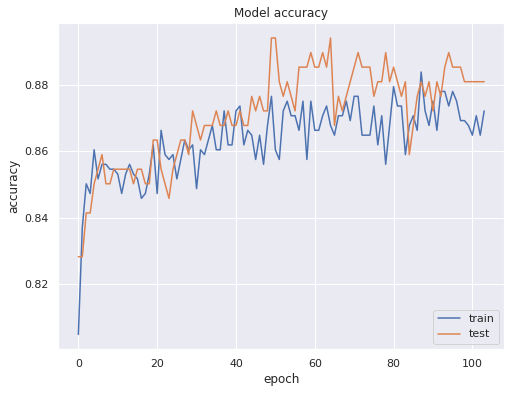

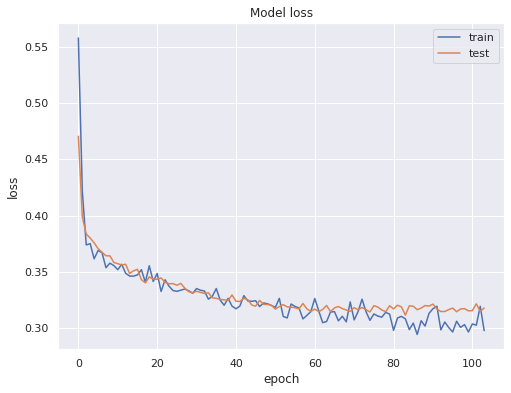

In [185]:
# summarize history for acc
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [186]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_Accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['Accuracy'])*100), '%')

Max val_acc achieved: 89.43 %
Max acc achieved: 88.40 %


In [187]:
print('Final val_acc achieved: %.2f' %(history.history['val_Accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['Accuracy'][-1]*100), '%')

Final val_acc achieved: 88.11 %
Final acc achieved: 87.22 %


In [188]:
val_accuracy = np.mean(history.history['val_Accuracy'])
print("\n%s: %.2f%%" % ('Mean of validation accuracy', val_accuracy*100))


Mean of validation accuracy: 87.12%


In [189]:
y_pred = model.predict(X_test)

In [190]:
y_pred = (y_pred > 0.5)

In [191]:
ann_cm = confusion_matrix(y_test, y_pred)
ann_acc = round(accuracy_score(y_pred,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[ 78   8]
 [ 19 122]]
88.11 %


In [192]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.91      0.80      0.85        97
        True       0.87      0.94      0.90       130

    accuracy                           0.88       227
   macro avg       0.89      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227

